In [1]:
import random
import numpy as np
import pandas as pd
from datetime import datetime
class generator:
    """ This Class,  GETS SOME SETTINGS AS THE BASIC CONSTRUCTION,
        BASED ON WHICH USES WHICH METHODES TO GENERATES THE
        DATA SET THAT CONCLUDES FORM THE CALCULATED POSITOON
        OF N CUSTOMERS AND THE DEPOT

        CONSTANT PROPERTIES:
            * MAX COORD : INTEGER
              DEFINES HOW MUCH COSTUMER COORDINATES SHOULD BE GENERATED

            * DECAY : INTEGER
              DISTANCE UNIT VALUE
              EACH CUSTOMER LOCATION CAN BE LCATED FURHTER THAN THE UNIT DISTANCE.

            * REPORT :
              a dictionary that holds the data of came up errors and procedure statuses


        METHODS :
          __INIT__
            * CONSTRUCTION METHOD
            * gets the initial settings to set up the generator to generate the
            desired dataset

          depot allocator

          cust allocator

          generate

          plot
    """
    #TODO : formating help text
    info="""
          "All the needed input arguments are settings which define properties of the desired output data set"

          n (number of customers)

          Depot positioning
              1 = Random
              2 = Centered
              3 = Cornered

          Customer positioning
              1 = Random
              2 = Clustered
              3 = Random-clustered

          Average route size
              1 = Very short
              2 = Short
              3 = Medium
              4 = Long
              5 = Very long
              6 = Ultra long

          ErrHandler (int)
              0 = replacing with default setting
              1 = getting setting again from user
        """

    # option ranges : uses for wrong input handling
    depotPos_option_range = np.arange(1,4, dtype=int)
    custPos_option_range = np.arange(1,4, dtype=int)
    avgRouteSize_option_range = np.arange(1,7, dtype=int)
    # How vast our map is.
    maxCoords = 5000
    # Whats the unit value for distance?
    decay = 80
    # report: keeps details from every operation and anomalies
    def __init__ (self, n :int, depotPos :int, custPos: int, avgRouteSize : int, instanceID : str, randSeed :int, ErrHandler: int):
      """
      # Attribute Initiator
      Initializes the properties that the object should get before generation

      """
      # procedures
      # TODO: Cleaning Validator Function
      def options_validator(self,depotPos, custPos, avgRouteSize, ErrHandler):
        """
        This function checks the inputed option for depotPos, and fixes them based on given errorhandler option .
        """
        def error_handler_procedure(self, option, ErrHandler):
          """
          This procedure gets an option and the error handler option and changes it based on ErrHandler
          """
          message= ""
          if ErrHandler == 0:
            option["value"] = 1
            message += f"the invalid value replaced with default option for {option['name']}, since the error handler was 0"
          else:
            option["value"] = input(f"""the option you entered for {option['name']} was invalid
                  for more information see the propery "help" """)
          self.report["constructor"]["anomalies"][option["name"]] = {"detail":message}
          self.report["constructor"]["object_updated_at"] = datetime.now()
          return option["value"]

        if depotPos not in self.depotPos_option_range:
          option = {"value":depotPos, "name": "depotPos"}
          depotPos=error_handler_procedure(self, option, ErrHandler)


        if custPos not in self.custPos_option_range:
          option = {"value":custPos, "name": "custPos"}
          custPos =error_handler_procedure(self, option, ErrHandler)

        if avgRouteSize not in self.avgRouteSize_option_range:
          option = {"value":avgRouteSize, "name": "avgRouteSize"}
          avgRouteSize =error_handler_procedure(self, option, ErrHandler)

        return depotPos, custPos, avgRouteSize

      # Error Handling Strategy
      self.ErrHandler = ErrHandler
      # number of customers
      self.n = n
      # Depot Positioning strategy setting
      self.depotPos_default = 1
      #Customer Position distribution strategi , depot positioning strategi
      self.custPos_default = 1
      self.depotPos,self.custPos, self.avgRouteSize = options_validator(self,depotPos, custPos, avgRouteSize, ErrHandler)
      # dictionary of max min rought distances correspond to every on of avgRoutSize Settings
      self.avgRoutSize_options = {1:(3,5), 2:(5,8), 3:(8,12), 4:(12,16), 5:(16,25), 6:(25,50)}
      # the ID that the generated instance should be labeled by.
      self.instanceID = instanceID
      # randon seed for reproducibility
      self.randSeed = randSeed
      # initial random seeding
      def random_initiator(randSeed):
        random.seed(randSeed)
        return random.randint(2, 6)
      self.nSeeds =  random_initiator(randSeed)
      # Deriving a random number between lowest possible and largest possible value
      self.r = random.uniform(self.avgRoutSize_options[self.avgRouteSize][0],
                              self.avgRoutSize_options[self.avgRouteSize][1])

      # Labeling the instance DataSet
      self.instanceName = f"""CSV{self.n}_{self.depotPos}_{self.custPos}_{self.avgRouteSize}_{self.instanceID}_02d"""
    # TODO _ clean it
    def depot_allocator(self):
      """
          # Allocating Depot Position
          this methode generate adds the first row into the dataset which
          Belongs to Depot

          Arguments:
            * self
          OutPut:
            * A Pandas DataFrame which first row represents the location of depot
      """
      positioning_options = {1: (random.randint(0, self.maxCoords), random.randint(0, self.maxCoords)), 2:(self.maxCoords/2, self.maxCoords/2), 3: (0,0)}

      # the initial coordinate container for depot and customers
      self.coords = pd.DataFrame(columns = ["X", "Y"])
      self.coords.loc[0] = dict(zip(list(self.coords.columns), positioning_options[self.depotPos]))
      report = {"depot_Pos_option":positioning_options[self.depotPos]}
      return report

    def distance(self,x:list, y:list):
      """
      # Distance Calculator
      This function takes
      """
      return np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

# df.isin([(value1, value2)]).all(axis=1).any()

    def cust_allocator(self):
      """
      # Allocating Customer's Position
      This method generate customers Positions based on the imported arguments
      """

      def random_cust_generator(nRandCust):
        # First Step Customer allocator
        def seed_generator(i):
          if i >= nRandCust+1:
            return 0
          x_ = random.randint(0,self.maxCoords)
          y_ = random.randint(0,self.maxCoords)

          def coords_validator(status, coords):

            if not status:
              self.coords.loc[len(self.coords)] = coords
              return 0

            x_ = random.randint(0,self.maxCoords)
            y_ = random.randint(0,self.maxCoords)

            coords = [x_, y_]
            return coords_validator(self.coords.isin(coords).all(axis=1).any(), coords)

          coords = [x_, y_]
          coords_validator(self.coords.isin(coords).all(axis=1).any(), coords)
          return seed_generator(i+1)

        seed_generator(1)

      def clustered_customers_generator(nClustCust):
        # Generation of the clustered customers
        seeds = []
        if nClustCust > 0:
          if nClustCust < self.nSeeds:
            print("Too many seeds!")
            return 0

          # generate the seeds
          for i in range(self.nSeeds):
            x_ = random.randint(0, self.maxCoords)
            y_ = random.randint(0, self.maxCoords)
            while self.coords.isin([x_, y_]).all(axis=1).any():
              x_ = random.randint(0, self.maxCoords)
              y_ = random.randint(0, self.maxCoords)
            self.coords.loc[len(self.coords)] = [x_, y_]
            seeds.append((x_,y_))

          self.nS += self.nSeeds
          # Determine the seed with maximum sum of weights (w.r.t. all seeds)
          maxWeight = 0.0
          for i,j in seeds:
            w_ij = 0.0
            for i_, j_ in seeds:
              w_ij += 2**(-self.distance((i,j), (i_, j_)) / self.decay)
            if w_ij > maxWeight:
              maxWeight = w_ij
          norm_factor = 1.0/maxWeight

          # Generate the remaining customers using Accept-reject method
          while self.nS < self.n:
            x_ = random.randint(0, self.maxCoords)
            y_ = random.randint(0, self.maxCoords)
            while self.coords.isin([x_, y_]).all(axis=1).any():
              x_ = random.randint(0, self.maxCoords)
              y_ = random.randint(0, self.maxCoords)

            weight = 0.0
            for i_, j_ in seeds:
              weight += 2**(-self.distance((x_,y_), (i_, j_)) / self.decay)
            weight *= norm_factor
            rand=random.uniform(0,1)

            if rand<=weight: # may the customer get accepted?.
              self.coords.loc[len(self.coords)] = [x_, y_]
              self.nS = self.nS + 1

      # A Dictionary that each of which keys points to its correspond procedure
      strategie = {
                   # clustered
                   1:(self.n, 0),
                   #random
                   2:(0, self.nSeeds),
                   #random_clustered
                   3: (int(self.n/2), self.nSeeds)}


      nRandCust, self.nSeeds = strategie[self.custPos]
      # The much n_Cluster we can have
      print(f"nRandCust: {nRandCust}")
      nClustCust = self.n - nRandCust
      print(f"nClustCust: {nClustCust}")
      #Generating random customers
      random_cust_generator(nRandCust)
      self.nS = nRandCust
      clustered_customers_generator(nClustCust)
      report = {"Options":{"nRandCust": nRandCust, "nClustCust": nClustCust}}
      return report

    def generate(self):
      # Executer Methode that executes depot_allocator and cust_allocator
      # Returns the generated DataSet
      self.depot_allocator()
      self.cust_allocator()
      print(self.coords.info())
      return self.coords

    def plot_data(self):
      # Plotting the Data
      from matplotlib import pyplot as plt
      depot = 0
      plt.scatter(self.coords["X"][1:], self.coords["Y"][1:], s=32,alpha=.9)
      plt.scatter(self.coords["X"][0], self.coords["Y"][0], s=200,alpha=.9, color="red", marker="*")
      # plt.gca().spines[['top', 'right',]].set_visible(False)

    def export_as_CSV(self):
        # Exports the dataset as CSV file
        data = self.coords
        address = "./instances/"
        name = f"{self.instanceID}_n{self.n}_k{self.randSeed}.csv"
        data.to_csv(address+name, index=False)

In [6]:
x = generator(439, 3, 1, 6, "instance_2", 689, 0)

In [7]:
x.generate()

nRandCust: 439
nClustCust: 0
<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       440 non-null    int64
 1   Y       440 non-null    int64
dtypes: int64(2)
memory usage: 10.3 KB
None


,X,Y
0,0,0
1,3917,4845
2,4500,2743
3,1687,743
4,1346,3445
...,...,...
435,4645,4376
436,1299,4196
437,4154,3872
438,4270,1493


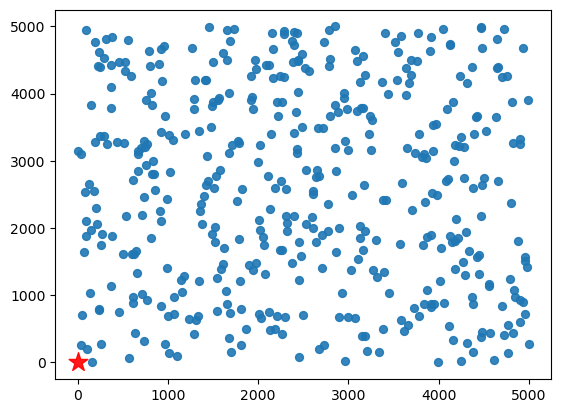

In [8]:
x.plot_data()

In [9]:
x.export_as_CSV()